### Get Federalist Papers and Pickle.
### Repeat for Little Women
### Repeat for Moby Dick

#### Breitzman 7/4/2023

In [1]:
#Get Federalist Papers
from urllib import request
url = "https://www.gutenberg.org/cache/epub/1404/pg1404.txt"

response = request.urlopen(url)
raw = response.read()
text = raw.decode("utf-8-sig")

In [2]:
#slicing routines
def left(s, amount):
    return s[:amount]

def right(s, amount):
    return s[-amount:]

In [4]:
#replace multiple spaces with single space
import re
text = re.sub("\s+", " ", text)

In [8]:
#kill front matter
text = right(text,len(text)-text.find('FEDERALIST No.'))

In [9]:
#kill back matter
text = left(text,text.find('*** END OF THE PROJECT GUTENBERG'))


In [10]:
#Probably not necessary but...
#remove Mr. and Mrs. to help the sentence tokenizer later
text = re.sub('Mrs\.','Mrs',text)
text = re.sub('Mr\.','Mr',text)


In [11]:
#Break Federalist papers up into individual texts
FedChapters = []
text5 = text
i = text5.find('FEDERALIST No.')
while(i >= 0):
    FedChapters.append((left(text5,i)).strip())
    text5 = right(text5,len(text5)-(i+14))
    i = text5.find('FEDERALIST No.')
    
FedChapters.append(text5.strip())


In [12]:
#returns the main text of a Federalist paper.
def getFedText(s):
  if (len(s)>0):
    t = s + ' PUBLIUS' #in case it's not there (but in most cases it is)
    i = t.find('PUBLIUS')
    t = left(t,i)
    i = t.find('State of New York')
    t = right(t,len(t)-(i+19))
    return t.strip()
  else:
    return ""

In [13]:
#Store Hamilton's Federalist papers in a Hamilton list, Madison's in a Madison list, etc. for Jay, joint, disputed papers
hamilton = []
jay = []
madison = []
joint = []
disputed = []
for i in range(len(FedChapters)):
    if (i in {2,3,4,5,64}):
        jay.append([i,[getFedText(FedChapters[i])]])
    else:
        if (i in {18,19,20}):
            joint.append([i,[getFedText(FedChapters[i])]])
        else:
            if (i in {49,50,51,52,53,54,55,56,57,58,62,63}):
                disputed.append([i,[getFedText(FedChapters[i])]])
            else:
                if (i in {10,14,37,38,39,40,41,42,43,44,45,46,47,48}):
                    madison.append([i,[getFedText(FedChapters[i])]])
                else:
                    if (i > 0):
                        hamilton.append([i,[getFedText(FedChapters[i])]])

In [25]:
for a in jay:
 print('Fed.No.'+str(a[0])+': '+a[1][0][:35]+'...')
        


Fed.No.2: WHEN the people of America reflect ...
Fed.No.3: IT IS not a new observation that th...
Fed.No.4: MY LAST paper assigned several reas...
Fed.No.5: QUEEN ANNE, in her letter of the 1s...
Fed.No.64: IT IS a just and not a new observat...


In [25]:
#pickle each author's Federalist Papers
import pickle
with open('hamilton.pik', 'wb') as f:
  pickle.dump(hamilton,f)

with open('madison.pik', 'wb') as f:
  pickle.dump(madison,f)

with open('jay.pik', 'wb') as f:
  pickle.dump(jay,f)

with open('joint.pik', 'wb') as f:
  pickle.dump(joint,f)

with open('disputed.pik', 'wb') as f:
  pickle.dump(disputed,f)



In [5]:
#test an arbitrary Federalist paper from Madison
with open('madison.pik', 'rb') as f:
    madison5 = pickle.load(f)

In [7]:
print(left(madison5[5][1][0],100))

THE SECOND point to be examined is, whether the convention were authorized to frame and propose this


In [31]:
#get Moby-Dick
url = "https://www.gutenberg.org/files/2701/2701-0.txt"

response = request.urlopen(url)
raw = response.read()
text = raw.decode("utf-8-sig")

In [34]:
text = re.sub("\s+", " ", text)

In [48]:
#kill front matter
text = right(text,len(text)-10000)
i = text.find('CHAPTER 1. Loomings.')
text = right(text,len(text)-i)

In [51]:
#kill back matter
text = left(text,text.find('*** END OF THE PROJECT GUTENBERG'))

In [53]:
#pickle Moby Dick text.
mobyDick = [text]
with open('mobyDick.pik', 'wb') as f:
  pickle.dump(mobyDick,f)

In [24]:
#Get "Little Women"
url = "https://www.gutenberg.org/cache/epub/37106/pg37106.txt"

response = request.urlopen(url)
raw = response.read()
text = raw.decode("utf-8-sig")    

In [25]:
text = re.sub("\s+", " ", text)

In [26]:
i = text.find('] I. PLAYING PILGRIMS.')
print(i)

9592


In [27]:
#kill front matter
text = right(text,len(text)-i-2)

In [28]:
left(text,100)

'I. PLAYING PILGRIMS. "Christmas won\'t be Christmas without any presents," grumbled Jo, lying on the '

In [29]:
len(text)

1056128

In [30]:
#kill back matter
text = left(text,text.find('*** END OF THE PROJECT GUTENBERG'))

In [31]:
len(text)

1037937

In [33]:
import pickle
#pickle LittleWomen text.
LittleWomen = [text]
with open('LittleWomen.pik', 'wb') as f:
  pickle.dump(LittleWomen,f)

In [34]:
with open('LittleWomen.pik', 'rb') as f:
    little5 = pickle.load(f)

In [57]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

def sentence_stats(document):
    sent_stats = []
    sentences = sent_tokenize(document)
    for sentence in sentences:
        words = word_tokenize(sentence)
        sent_stats.append(len(words)-1)
    return(sent_stats)

sentence_stats("The quick brown fox jumped over the lazy dog. A short sentence.")


[9, 3]

In [58]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

text_2sentences = "The quick brown fox jumped over the lazy dog. A short sentence."

sentences = sent_tokenize(text_2sentences)

for x in sentences:
    print(word_tokenize(x))

['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', '.']
['A', 'short', 'sentence', '.']


In [36]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize


def wc(str1):
    words = word_tokenize(str1)
    return(len(words))

In [39]:
hamiltonSentLengths = []
for x in hamilton:
    sents = sent_tokenize(x[1][0])
    for a in sents:
        hamiltonSentLengths.append(wc(a))
        
madisonSentLengths = []
for x in madison:
    sents = sent_tokenize(x[1][0])
    for a in sents:
        madisonSentLengths.append(wc(a))
        
jaySentLengths = []
for x in jay:
    sents = sent_tokenize(x[1][0])
    for a in sents:
        jaySentLengths.append(wc(a))

disputedSentLengths = []
for x in disputed:
    sents = sent_tokenize(x[1][0])
    for a in sents:
        disputedSentLengths.append(wc(a))

In [40]:
print(len(hamiltonSentLengths),hamiltonSentLengths[:10])
print(len(madisonSentLengths),madisonSentLengths[:10])
print(len(jaySentLengths),jaySentLengths[:10])
print(len(disputedSentLengths),disputedSentLengths[:10])

3278 [30, 48, 66, 60, 29, 31, 16, 49, 109, 16]
1160 [30, 28, 34, 52, 54, 83, 32, 93, 26, 58]
215 [60, 45, 72, 47, 42, 32, 52, 39, 32, 58]
775 [65, 57, 57, 58, 91, 90, 42, 33, 24, 53]


In [41]:
mobySentLengths = []
for x in mobyDick:
    sents = sent_tokenize(x)
    for a in sents:
        mobySentLengths.append(wc(a))

In [42]:
print(len(mobySentLengths),mobySentLengths[:10])

8606 [3, 2, 4, 41, 16, 97, 9, 18, 7, 30]


In [45]:
little5SentLengths = []
for x in little5:
    sents = sent_tokenize(x)
    for a in sents:
        little5SentLengths.append(wc(a))

In [46]:
print(len(little5SentLengths),little5SentLengths[:10])

9097 [2, 3, 19, 10, 10, 35, 20, 42, 26, 64]


In [47]:
def cleanSentArray(x):
    y = []
    for xx in x:
        if (xx <= 3):
            pass
        else:
            if (xx > 100):
                y.append(100)
            else:
                y.append(xx)
    return(y)

In [48]:
hamiltonSentLengths = cleanSentArray(hamiltonSentLengths)
madisonSentLengths = cleanSentArray(madisonSentLengths)
jaySentLengths = cleanSentArray(jaySentLengths)
mobySentLengths = cleanSentArray(mobySentLengths)
little5SentLengths = cleanSentArray(little5SentLengths)

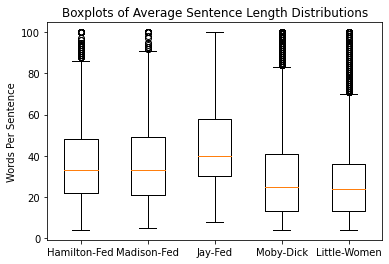

In [50]:
import matplotlib.pyplot as plt
plt.boxplot([hamiltonSentLengths,madisonSentLengths,jaySentLengths,mobySentLengths,little5SentLengths],vert=True)
plt.ylabel("Words Per Sentence")
#plt.xlabel("Federalist Paper Authors")
plt.xticks([1,2,3,4,5],['Hamilton-Fed','Madison-Fed','Jay-Fed','Moby-Dick','Little-Women'])
plt.title("Boxplots of Average Sentence Length Distributions")
plt.show()

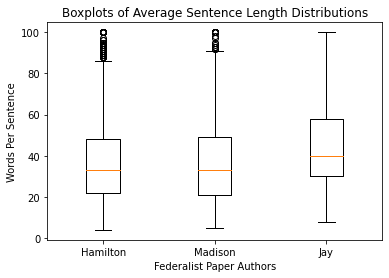

In [52]:
import matplotlib.pyplot as plt
plt.boxplot([hamiltonSentLengths,madisonSentLengths,jaySentLengths],vert=True)
plt.ylabel("Words Per Sentence")
plt.xlabel("Federalist Paper Authors")
plt.xticks([1,2,3],['Hamilton','Madison','Jay'])
plt.title("Boxplots of Average Sentence Length Distributions")
plt.show()

In [101]:
chars=0
words=0
for x in hamilton:
    a = x[1][0].strip()
    words1 = word_tokenize(a)
    for w in words1:
      chars+=len(w)
    words+=len(words1)
print('hamilton avg word length:',chars/words)
    
chars=0
words=0
for x in madison:
    a = x[1][0].strip()
    words1 = word_tokenize(a)
    for w in words1:
      chars+=len(w)
    words+=len(words1)
print('madison avg word length:',chars/words)
    
chars=0
words=0
for x in jay:
    a = x[1][0].strip()
    words1 = word_tokenize(a)
    for w in words1:
      chars+=len(w)
    words+=len(words1)
print('jay avg word length:',chars/words)
    
chars=0
words=0
for x in disputed:
    a = x[1][0].strip()
    words1 = word_tokenize(a)
    for w in words1:
      chars+=len(w)
    words+=len(words1)
print('disputed avg word length:',chars/words)
    
words=0
chars=0
for x in TaleOfTwoCities:
    a = x.strip()
    words1 = word_tokenize(a)
    for w in words1:
      chars+=len(w)
    words+=len(words1)
print('Tale-of-Two-Cities avg word length:',chars/words)
    
words=0
chars=0
for x in mobyDick:
    a = x.strip()
    words1 = word_tokenize(a)
    for w in words1:
      chars+=len(w)
    words+=len(words1)
print('Moby-Dick avg word length:',chars/words)

hamilton avg word length: 4.423035182065569
madison avg word length: 4.493796640713444
jay avg word length: 4.467439115974681
disputed avg word length: 4.482459096184806
Tale-of-Two-Cities avg word length: 3.7006302521008405
Moby-Dick avg word length: 3.9158383220380273
